# Loading in Residual Count Dataset

- each value shows gene expression via RNA sequencing

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('data/RNAseqHarm/ROSMAP_Residualized_counts_(diagnosis-sex-age-death).tsv', delimiter="\t")
df1 = pd.read_csv('data/RNAseqHarm/RNAseq_Harmonization_ROSMAP_combined_metadata.csv')

In [7]:
df.head(10)

,feature,510_120515,207_120424,81_120417,649_120529,487_120515,182_120424,193_120424,694_120605,366_120502,...,RISK_73_redo,RISK_74_redo,RISK_78_redo,RISK_8_rerun,RISK_81,RISK_84_redo,RISK_9_rerun,RISK_93,RISK_94,RISK_97
0,ENSG00000000003,0.539745,-0.455791,0.029483,0.927509,-0.821087,-0.654538,-0.614155,0.214444,-0.128681,...,0.271698,0.589006,0.067369,-0.857244,-0.226842,0.671701,-0.550307,0.499669,0.351977,-0.035916
1,ENSG00000000419,0.032998,-0.096528,-0.003849,0.177671,0.108173,0.139221,0.224714,-0.057777,0.004272,...,0.082186,-0.560791,0.040942,-0.284402,0.234696,0.329957,-0.052247,0.204763,0.239964,0.327986
2,ENSG00000000457,-0.047954,-0.045705,0.310797,0.065068,0.166983,0.095107,0.568559,-0.043476,0.037663,...,-0.162151,-0.083143,0.167290,0.067710,-0.434691,0.474219,-0.189981,0.285131,0.152923,0.158028
3,ENSG00000000460,0.405351,0.317188,0.124757,-0.476037,-0.130254,-0.398921,-0.113542,-0.432209,0.244010,...,0.164703,0.168071,0.572947,-0.452513,-0.160455,0.092876,-0.273187,0.130140,0.065093,-0.208337
4,ENSG00000000938,0.463631,0.351991,0.790630,-0.827755,-0.561926,-0.840376,-0.790768,0.498372,0.877291,...,1.758510,2.478327,1.565875,-0.212365,0.676613,0.769315,-0.681266,-0.128797,-0.558991,-0.064519
5,ENSG00000000971,1.249937,-0.146874,0.441918,-0.236982,0.623419,-1.453353,-0.904159,-0.062802,0.237937,...,1.266400,1.484600,1.889318,-0.971408,1.495780,1.123114,-1.491756,-0.138974,-0.451745,-0.009636
6,ENSG00000001036,-0.008286,-0.188718,-0.416688,0.067627,-0.826699,-0.316829,-0.273161,0.091899,-0.208860,...,0.561804,0.596316,0.589364,-0.899998,-0.399443,0.224895,-0.513777,0.036233,0.056219,-0.101588
7,ENSG00000001084,-0.147353,-0.176679,-0.414205,0.319511,-1.245328,-0.059856,-0.313164,0.383010,0.182327,...,-0.361973,-0.279739,0.380595,-0.677527,-0.708829,0.328682,-0.237025,0.114929,0.071345,-0.145800
8,ENSG00000001167,-0.072896,-0.090253,-0.412765,-0.063603,-0.390481,-0.072175,-0.230172,0.049609,-0.051426,...,0.191957,0.503687,0.617166,-0.159221,0.087337,0.048982,-0.421458,0.039707,-0.079274,-0.262131
9,ENSG00000001460,0.122713,0.099842,-0.073140,0.338188,0.192039,0.166705,0.367206,-0.160384,0.151252,...,-0.615839,-0.478519,-0.035306,-0.035690,-0.355101,-0.289961,0.350868,-0.567807,-0.069780,-0.100728


In [8]:
df2 = df.T

In [9]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,18849,18850,18851,18852,18853,18854,18855,18856,18857,18858
feature,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000288030,ENSG00000288033,ENSG00000288044,ENSG00000288048,ENSG00000288049,ENSG00000288061,ENSG00000288062,ENSG00000288075,ENSG00000288107,ENSG00000288108
510_120515,0.539745,0.032998,-0.047954,0.405351,0.463631,1.249937,-0.008286,-0.147353,-0.072896,0.122713,...,0.023564,-0.97089,-0.417444,-0.001555,-2.033615,-0.125635,-0.642736,-0.286241,-0.127179,-0.438888
207_120424,-0.455791,-0.096528,-0.045705,0.317188,0.351991,-0.146874,-0.188718,-0.176679,-0.090253,0.099842,...,0.377216,-0.56167,-0.413923,0.312901,2.305215,-0.12738,0.12295,-0.688376,0.606388,1.22845
81_120417,0.029483,-0.003849,0.310797,0.124757,0.79063,0.441918,-0.416688,-0.414205,-0.412765,-0.07314,...,-1.062504,0.379108,0.194086,-0.293941,2.348017,0.746473,-0.17943,0.228797,0.148467,0.17962
649_120529,0.927509,0.177671,0.065068,-0.476037,-0.827755,-0.236982,0.067627,0.319511,-0.063603,0.338188,...,-0.722717,-0.436119,-0.636299,-0.038195,-1.59556,-0.070071,-0.351987,0.280626,-0.149372,0.555551


In [10]:
df2.reset_index(inplace=True)

In [11]:
df2.columns = df2.iloc[0]
df2 = df2[1:]

In [12]:
df2.rename(columns={'feature':'ID'}, inplace=True)

In [13]:
df2.head()

,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000288030,ENSG00000288033,ENSG00000288044,ENSG00000288048,ENSG00000288049,ENSG00000288061,ENSG00000288062,ENSG00000288075,ENSG00000288107,ENSG00000288108
1,510_120515,0.539745,0.032998,-0.047954,0.405351,0.463631,1.249937,-0.008286,-0.147353,-0.072896,...,0.023564,-0.97089,-0.417444,-0.001555,-2.033615,-0.125635,-0.642736,-0.286241,-0.127179,-0.438888
2,207_120424,-0.455791,-0.096528,-0.045705,0.317188,0.351991,-0.146874,-0.188718,-0.176679,-0.090253,...,0.377216,-0.56167,-0.413923,0.312901,2.305215,-0.12738,0.12295,-0.688376,0.606388,1.22845
3,81_120417,0.029483,-0.003849,0.310797,0.124757,0.79063,0.441918,-0.416688,-0.414205,-0.412765,...,-1.062504,0.379108,0.194086,-0.293941,2.348017,0.746473,-0.17943,0.228797,0.148467,0.17962
4,649_120529,0.927509,0.177671,0.065068,-0.476037,-0.827755,-0.236982,0.067627,0.319511,-0.063603,...,-0.722717,-0.436119,-0.636299,-0.038195,-1.59556,-0.070071,-0.351987,0.280626,-0.149372,0.555551
5,487_120515,-0.821087,0.108173,0.166983,-0.130254,-0.561926,0.623419,-0.826699,-1.245328,-0.390481,...,0.178033,-0.374037,-0.454228,0.559599,3.03256,-0.072668,0.064121,0.822951,1.840432,0.002488


In [14]:
df2.shape

(2456, 18860)

In [15]:
df2['ID']

1         510_120515
2         207_120424
3          81_120417
4         649_120529
5         487_120515
            ...     
2452    RISK_84_redo
2453    RISK_9_rerun
2454         RISK_93
2455         RISK_94
2456         RISK_97
Name: ID, Length: 2456, dtype: object

In [16]:
df1['specimenID'].value_counts().head()

88_120417     2
470_120514    2
46_120416     2
460_120514    2
461_120514    2
Name: specimenID, dtype: int64

In [20]:
df1.columns

Index(['specimenID', 'platform', 'RIN', 'libraryBatch', 'sequencingBatch',
       'libraryPrep', 'libraryPreparationMethod', 'isStranded',
       'readStrandOrigin', 'runType', 'readLength', 'notes', 'individualID',
       'organ', 'tissue', 'BrodmannArea', 'nucleicAcidSource', 'isPostMortem',
       'assay', 'exclude', 'excludeReason', 'projid', 'Study', 'msex', 'educ',
       'race', 'spanish', 'apoe_genotype', 'age_at_visit_max',
       'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx',
       'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv'],
      dtype='object')

In [99]:
dfy = df1[[
       'specimenID', 'organ', 'tissue', 'BrodmannArea', 'nucleicAcidSource', 'isPostMortem',
       'assay', 'exclude', 'excludeReason', 'projid', 'Study', 'msex', 'educ',
       'race', 'spanish', 'apoe_genotype',
       'age_first_ad_dx', 'cts_mmse30_first_ad_dx',
       'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx']]

In [100]:
dfy['tissue'].value_counts()

dorsolateral prefrontal cortex    1726
Head of caudate nucleus            749
posterior cingulate cortex         671
temporal cortex                    125
frontal cortex                     123
Name: tissue, dtype: int64

In [101]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   specimenID              3400 non-null   object 
 1   organ                   3394 non-null   object 
 2   tissue                  3394 non-null   object 
 3   BrodmannArea            248 non-null    float64
 4   nucleicAcidSource       3036 non-null   object 
 5   isPostMortem            248 non-null    object 
 6   assay                   3400 non-null   object 
 7   exclude                 68 non-null     object 
 8   excludeReason           68 non-null     object 
 9   projid                  3398 non-null   float64
 10  Study                   3398 non-null   object 
 11  msex                    3398 non-null   float64
 12  educ                    3398 non-null   float64
 13  race                    3398 non-null   float64
 14  spanish                 3398 non-null   

In [102]:
dfy = dfy[dfy['exclude'].isnull()]

In [103]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3332 entries, 0 to 3399
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   specimenID              3332 non-null   object 
 1   organ                   3326 non-null   object 
 2   tissue                  3326 non-null   object 
 3   BrodmannArea            248 non-null    float64
 4   nucleicAcidSource       2989 non-null   object 
 5   isPostMortem            248 non-null    object 
 6   assay                   3332 non-null   object 
 7   exclude                 0 non-null      object 
 8   excludeReason           0 non-null      object 
 9   projid                  3330 non-null   float64
 10  Study                   3330 non-null   object 
 11  msex                    3330 non-null   float64
 12  educ                    3330 non-null   float64
 13  race                    3330 non-null   float64
 14  spanish                 3330 non-null   

In [104]:
dfy = dfy.drop(columns=['exclude', 'excludeReason'])

In [105]:
dfy = dfy.drop(columns=['organ', 'BrodmannArea', 'age_first_ad_dx', 'cts_mmse30_first_ad_dx'])

In [106]:
dfy.columns

Index(['specimenID', 'tissue', 'nucleicAcidSource', 'isPostMortem', 'assay',
       'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype',
       'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx'],
      dtype='object')

In [107]:
dfy['nucleicAcidSource'].value_counts()

bulk cell    2989
Name: nucleicAcidSource, dtype: int64

In [108]:
dfy = dfy.drop(columns=['nucleicAcidSource', 'isPostMortem', 'assay', 'projid',
       'Study',
       'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc'])

In [109]:
dfy = dfy.drop(columns=['educ','race','spanish'])

In [110]:
dfy

,specimenID,tissue,msex,apoe_genotype,cogdx
0,Res_1,frontal cortex,0.0,33.0,1.0
1,Res_2,frontal cortex,0.0,33.0,1.0
2,Res_4,frontal cortex,0.0,33.0,1.0
3,Res_5,frontal cortex,0.0,33.0,1.0
4,Res_6,frontal cortex,0.0,23.0,1.0
...,...,...,...,...,...
3395,RISK_84_redo,posterior cingulate cortex,0.0,33.0,1.0
3396,RISK_9_rerun,dorsolateral prefrontal cortex,0.0,33.0,1.0
3397,RISK_93,dorsolateral prefrontal cortex,0.0,23.0,4.0
3398,RISK_94,posterior cingulate cortex,0.0,23.0,4.0


In [111]:
dfy['HasAlzheimer'] = dfy['cogdx'].apply(lambda x: 1 if x in [4, 5] else 0 if x == 1 else np.nan)

In [112]:
dfy.head(1)

,specimenID,tissue,msex,apoe_genotype,cogdx,HasAlzheimer
0,Res_1,frontal cortex,0.0,33.0,1.0,0.0


In [114]:
dfy.tail(40)

,specimenID,tissue,msex,apoe_genotype,cogdx,HasAlzheimer
3360,RISK_327,dorsolateral prefrontal cortex,1.0,23.0,2.0,NaN
3361,RISK_334,dorsolateral prefrontal cortex,1.0,34.0,1.0,0.0
3362,RISK_335,dorsolateral prefrontal cortex,0.0,33.0,1.0,0.0
3363,RISK_339,dorsolateral prefrontal cortex,1.0,34.0,5.0,1.0
3364,RISK_342,dorsolateral prefrontal cortex,1.0,33.0,4.0,1.0
3365,RISK_345,dorsolateral prefrontal cortex,1.0,34.0,4.0,1.0
3366,RISK_346,dorsolateral prefrontal cortex,0.0,33.0,4.0,1.0
3367,RISK_351,dorsolateral prefrontal cortex,0.0,33.0,2.0,NaN
3368,RISK_372,dorsolateral prefrontal cortex,0.0,44.0,4.0,1.0
3369,RISK_377,dorsolateral prefrontal cortex,0.0,33.0,4.0,1.0


In [115]:
dfx = pd.merge(dfy, df2, left_on='specimenID', right_on='ID', how='inner')

In [116]:
dfx['specimenID'].value_counts()

492_120515               2
567_120521               2
560_120517               2
561_120517               2
562_120517               2
                        ..
Sample_R5407536-AC       1
Sample_R5407536-DLPFC    1
Sample_R1073074-AC       1
Sample_R1073074-PCC      1
RISK_97                  1
Name: specimenID, Length: 2456, dtype: int64

In [117]:
dfx = dfx.drop_duplicates(subset='specimenID')

In [118]:
dfx.shape

(2456, 18866)

In [120]:
dfx['specimenID'].value_counts()

492_120515             1
Sample_R9253870-PCC    1
Sample_R2871843-PCC    1
Sample_R8615683-AC     1
Sample_R8266864-AC     1
                      ..
Sample_R1214999-PCC    1
Sample_R1214999-AC     1
Sample_R3328867-AC     1
Sample_R2752714-PCC    1
RISK_97                1
Name: specimenID, Length: 2456, dtype: int64

In [121]:
dfx.head()

,specimenID,tissue,msex,apoe_genotype,cogdx,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,...,ENSG00000288030,ENSG00000288033,ENSG00000288044,ENSG00000288048,ENSG00000288049,ENSG00000288061,ENSG00000288062,ENSG00000288075,ENSG00000288107,ENSG00000288108
0,492_120515,dorsolateral prefrontal cortex,1.0,33.0,4.0,1.0,492_120515,-0.432004,-0.062111,0.11296,...,-0.048852,-0.0733,-0.161494,-0.700259,3.569068,-0.337891,0.142195,0.514537,0.088058,0.132191
2,01_120405,dorsolateral prefrontal cortex,0.0,33.0,6.0,NaN,01_120405,-0.355546,-0.34549,-0.504667,...,-0.692533,0.098602,0.68737,-0.520883,-0.849084,0.359026,-0.301622,0.568921,1.465695,-1.344327
4,02_120405,dorsolateral prefrontal cortex,0.0,24.0,4.0,1.0,02_120405,-0.816047,0.236233,0.276747,...,1.331595,-0.303728,0.667944,-1.550739,-1.815264,0.019518,0.368153,0.245726,-0.158405,-0.002209
6,03_120405,dorsolateral prefrontal cortex,0.0,33.0,1.0,0.0,03_120405,-0.958931,0.000739,0.548188,...,0.283749,0.430266,0.03365,-0.445345,-1.337655,0.203595,1.017957,-0.14871,1.903356,0.858265
8,04_120405,dorsolateral prefrontal cortex,0.0,23.0,1.0,0.0,04_120405,-0.115041,0.200627,0.227565,...,-0.134851,0.174122,-0.195698,-0.652698,-1.696429,0.320636,-0.06094,-0.429307,-0.240233,-0.394856


In [122]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   specimenID    3400 non-null   object 
 1   cogdx         3397 non-null   float64
 2   HasAlzheimer  2524 non-null   float64
dtypes: float64(2), object(1)
memory usage: 79.8+ KB


In [123]:
dfx = dfx.dropna()

In [124]:
dfx.shape

(1818, 18866)

In [126]:
dfx.head()

,specimenID,tissue,msex,apoe_genotype,cogdx,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,...,ENSG00000288030,ENSG00000288033,ENSG00000288044,ENSG00000288048,ENSG00000288049,ENSG00000288061,ENSG00000288062,ENSG00000288075,ENSG00000288107,ENSG00000288108
0,492_120515,dorsolateral prefrontal cortex,1.0,33.0,4.0,1.0,492_120515,-0.432004,-0.062111,0.11296,...,-0.048852,-0.0733,-0.161494,-0.700259,3.569068,-0.337891,0.142195,0.514537,0.088058,0.132191
4,02_120405,dorsolateral prefrontal cortex,0.0,24.0,4.0,1.0,02_120405,-0.816047,0.236233,0.276747,...,1.331595,-0.303728,0.667944,-1.550739,-1.815264,0.019518,0.368153,0.245726,-0.158405,-0.002209
6,03_120405,dorsolateral prefrontal cortex,0.0,33.0,1.0,0.0,03_120405,-0.958931,0.000739,0.548188,...,0.283749,0.430266,0.03365,-0.445345,-1.337655,0.203595,1.017957,-0.14871,1.903356,0.858265
8,04_120405,dorsolateral prefrontal cortex,0.0,23.0,1.0,0.0,04_120405,-0.115041,0.200627,0.227565,...,-0.134851,0.174122,-0.195698,-0.652698,-1.696429,0.320636,-0.06094,-0.429307,-0.240233,-0.394856
12,07_120410,dorsolateral prefrontal cortex,1.0,33.0,1.0,0.0,07_120410,-1.026603,0.024091,-0.010076,...,-0.063903,0.441658,0.301135,-0.254509,3.724301,0.703543,0.581852,-0.280216,1.505367,-0.042449


In [127]:
dfx['tissue'].value_counts()

dorsolateral prefrontal cortex    817
Head of caudate nucleus           517
posterior cingulate cortex        484
Name: tissue, dtype: int64

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [143]:
from keras import models
from keras import layers
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [144]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [145]:
from tqdm import tqdm

In [146]:
dfx.head(1)

,specimenID,tissue,msex,apoe_genotype,cogdx,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,...,ENSG00000288030,ENSG00000288033,ENSG00000288044,ENSG00000288048,ENSG00000288049,ENSG00000288061,ENSG00000288062,ENSG00000288075,ENSG00000288107,ENSG00000288108
0,492_120515,dorsolateral prefrontal cortex,1.0,33.0,4.0,1.0,492_120515,-0.432004,-0.062111,0.11296,...,-0.048852,-0.0733,-0.161494,-0.700259,3.569068,-0.337891,0.142195,0.514537,0.088058,0.132191


In [197]:
X = dfx.drop(['specimenID', 'cogdx', 'HasAlzheimer', 'ID'], axis=1)  
y = dfx['HasAlzheimer']

categorical_cols = ['tissue']  # Add other categorical column names if needed

# Define numerical columns
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [198]:
for col in tqdm(numerical_cols):
    X[col] = pd.to_numeric(X[col], errors='coerce').astype('float32')

100%|█████████████████████████████████████| 18861/18861 [37:56<00:00,  8.29it/s]


In [200]:
print(X.columns)

Index(['tissue', 'msex', 'apoe_genotype', 'ENSG00000000003', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036',
       ...
       'ENSG00000288030', 'ENSG00000288033', 'ENSG00000288044',
       'ENSG00000288048', 'ENSG00000288049', 'ENSG00000288061',
       'ENSG00000288062', 'ENSG00000288075', 'ENSG00000288107',
       'ENSG00000288108'],
      dtype='object', length=18862)


In [201]:
all_floats = ((X.dtypes == 'float64') | (X.dtypes == 'float32')).all()
print(all_floats)

False


In [202]:
all_floats = ((X[numerical_cols].dtypes == 'float64') | (X[numerical_cols].dtypes == 'float32')).all()
print(all_floats)

True


In [203]:
not_floats = X.dtypes[~((X.dtypes == 'float64') | (X.dtypes == 'float32'))]
print(not_floats)


tissue    object
dtype: object


In [204]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
# Define the model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)


# Create and evaluate the pipeline
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model1)
                       ])

# Fit and predict
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)



In [206]:

print(classification_report(y_test, y_pred1))

print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.68      0.64      0.66       177
         1.0       0.68      0.71      0.69       187

    accuracy                           0.68       364
   macro avg       0.68      0.68      0.68       364
weighted avg       0.68      0.68      0.68       364

[[114  63]
 [ 54 133]]


In [261]:
model2 = LogisticRegression(max_iter=1000)

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model2)
                       ])


In [262]:
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.19%


In [215]:

print(classification_report(y_test, y_pred2))

print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88       177
         1.0       0.88      0.90      0.89       187

    accuracy                           0.88       364
   macro avg       0.88      0.88      0.88       364
weighted avg       0.88      0.88      0.88       364

[[153  24]
 [ 19 168]]


In [216]:
model3 = xgb.XGBClassifier()

pipe3 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model3)
                       ])


In [219]:

pipe3.fit(X_train, y_train)
y_pred3 = pipe3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.90%


In [221]:

print(classification_report(y_test, y_pred3))

print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72       177
         1.0       0.73      0.79      0.76       187

    accuracy                           0.74       364
   macro avg       0.74      0.74      0.74       364
weighted avg       0.74      0.74      0.74       364

[[121  56]
 [ 39 148]]


In [230]:
from keras import regularizers
from scikeras.wrappers import KerasClassifier

In [239]:
def create_model():
    model4 = models.Sequential()
    model4.add(layers.Dense(512, activation='relu', input_shape=(18864,)))
    model4.add(layers.Dense(256, activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(layers.Dense(128, activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(layers.Dense(1, activation='sigmoid'))

    model4.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
    return model4


In [247]:
model5 = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=2)

In [248]:
pipe5 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model5)
                       ])


In [249]:
pipe5.fit(X_train, y_train)
y_pred5 = pipe5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Epoch 1/50


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2023-07-28 12:42:58.741962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


146/146 - 2s - loss: 0.8985 - acc: 0.5557 - 2s/epoch - 17ms/step
Epoch 2/50
146/146 - 2s - loss: 0.7697 - acc: 0.5922 - 2s/epoch - 11ms/step
Epoch 3/50
146/146 - 2s - loss: 0.6908 - acc: 0.6121 - 2s/epoch - 11ms/step
Epoch 4/50
146/146 - 2s - loss: 0.6329 - acc: 0.6575 - 2s/epoch - 11ms/step
Epoch 5/50
146/146 - 2s - loss: 0.5985 - acc: 0.6898 - 2s/epoch - 11ms/step
Epoch 6/50
146/146 - 2s - loss: 0.5482 - acc: 0.7276 - 2s/epoch - 11ms/step
Epoch 7/50
146/146 - 2s - loss: 0.5073 - acc: 0.7524 - 2s/epoch - 12ms/step
Epoch 8/50
146/146 - 2s - loss: 0.4445 - acc: 0.7854 - 2s/epoch - 11ms/step
Epoch 9/50
146/146 - 2s - loss: 0.4142 - acc: 0.8116 - 2s/epoch - 11ms/step
Epoch 10/50
146/146 - 2s - loss: 0.3566 - acc: 0.8439 - 2s/epoch - 11ms/step
Epoch 11/50
146/146 - 2s - loss: 0.2738 - acc: 0.8838 - 2s/epoch - 10ms/step
Epoch 12/50
146/146 - 2s - loss: 0.2544 - acc: 0.9010 - 2s/epoch - 10ms/step
Epoch 13/50
146/146 - 1s - loss: 0.2638 - acc: 0.8851 - 1s/epoch - 10ms/step
Epoch 14/50
146/146

2023-07-28 12:44:21.105309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [250]:
y_pred_proba = pipe5.predict(X_test)
y_pred5 = np.where(y_pred_proba > 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


37/37 - 0s - 131ms/epoch - 4ms/step
Accuracy: 79.95%


In [252]:

print(classification_report(y_test, y_pred5))

print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       177
         1.0       0.83      0.76      0.80       187

    accuracy                           0.80       364
   macro avg       0.80      0.80      0.80       364
weighted avg       0.80      0.80      0.80       364

[[148  29]
 [ 44 143]]


In [265]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the parameter grid for logistic regression with penalty
param_grid_with_penalty = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Define the parameter grid for logistic regression without penalty
param_grid_without_penalty = {
    'model__penalty': [None],
    'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create a base model
logreg = LogisticRegression(max_iter=10000)

# Create pipeline
pipe6 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', logreg)
                       ])

# Instantiate the grid search model
grid_search_with_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_with_penalty, cv=5, n_jobs=-1, verbose=2)
grid_search_without_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_without_penalty, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_with_penalty.fit(X_train, y_train)
grid_search_without_penalty.fit(X_train, y_train)

# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)


Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV] END model__C=0.001, model__penalty=l1, model__solver=newton-cg; total time=   1.8s
[CV] END model__C=0.001, model__penalty=l1, model__solver=sag; total time=   2.1s
[CV] END model__C=0.001, model__penalty=l1, model__solver=saga; total time=   3.6s
[CV] END model__C=0.001, model__penalty=l2, model__solver=newton-cg; total time=  11.4s
[CV] END model__C=0.001, model__penalty=l2, model__solver=sag; total time= 1.8min
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=newton-cg; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=newton-cg; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=newton-cg; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=newton-cg; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=newton-cg; total time=   0.5s
[CV] END model__C=0.001, model__pe

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=lbfgs; total time=   0.4s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=lbfgs; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=lbfgs; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=lbfgs; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=liblinear; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=liblinear; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=liblinear; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=liblinear; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=liblinear; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=sag; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__sol

[CV] END model__C=0.001, model__penalty=l1, model__solver=lbfgs; total time=   1.7s
[CV] END model__C=0.001, model__penalty=l1, model__solver=sag; total time=   2.1s
[CV] END model__C=0.001, model__penalty=l1, model__solver=saga; total time=   3.4s
[CV] END model__C=0.001, model__penalty=l2, model__solver=newton-cg; total time=  11.9s
[CV] END model__C=0.001, model__penalty=l2, model__solver=saga; total time= 4.9min
[CV] END model__C=0.01, model__penalty=l2, model__solver=sag; total time= 1.1min
[CV] END model__C=0.01, model__penalty=l2, model__solver=saga; total time= 1.8min
[CV] END model__C=0.1, model__penalty=l1, model__solver=saga; total time=13.3min
[CV] END ...model__C=1, model__penalty=l2, model__solver=sag; total time= 4.3min
[CV] END ..model__C=1, model__penalty=l2, model__solver=saga; total time= 5.6min
[CV] END .model__C=10, model__penalty=l1, model__solver=saga; total time=13.7min
[CV] END model__C=100, model__penalty=l2, model__solver=liblinear; total time=  10.4s
[CV] EN

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
280 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters with penalty: {'model__C': 1000, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Best parameters without penalty: {'model__penalty': None, 'model__solver': 'newton-cg'}
Best score with penalty: 0.8466003080933759
Best score without penalty: 0.8287237824386775


In [284]:
# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)

Best parameters with penalty: {'model__C': 1000, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Best parameters without penalty: {'model__penalty': None, 'model__solver': 'newton-cg'}
Best score with penalty: 0.8466003080933759
Best score without penalty: 0.8287237824386775


In [289]:
# Get the best parameters from the grid search
best_params = grid_search_with_penalty.best_params_

# Adjust the parameters by removing 'model__'
best_params_adjusted = {k.replace('model__', ''): v for k, v in best_params.items()}

# Fit a new model using the best parameters from the grid search
best_model = LogisticRegression(C=best_params_adjusted['C'], 
                                penalty=best_params_adjusted['penalty'], 
                                solver=best_params_adjusted['solver'], 
                                max_iter=1000)

# Create and evaluate the pipeline
pipe7 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', best_model)
                       ])

# Fit and predict
pipe7.fit(X_train, y_train)
y_pred7 = pipe7.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred7)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred7))

print(confusion_matrix(y_test, y_pred7))


Accuracy: 88.19%
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       177
         1.0       0.88      0.89      0.89       187

    accuracy                           0.88       364
   macro avg       0.88      0.88      0.88       364
weighted avg       0.88      0.88      0.88       364

[[155  22]
 [ 21 166]]


In [361]:
# Get the one-hot encoder from the preprocessor
onehot = pipe7.named_steps['preprocessor'].named_transformers_['cat']

# Get the feature names after one-hot encoding
onehot_features = onehot.get_feature_names_out(categorical_cols)

# This will give you a list of original features
original_features = numerical_cols

# Combine original and one-hot encoded feature names
feature_names = np.concatenate([original_features, onehot_features])

# Get the coefficients from the model
coefficients = pipe7.named_steps['model'].coef_[0]

# Create a pandas Series for easy manipulation
coef_series = pd.Series(coefficients, index=feature_names)

# Get the absolute values to consider the magnitude of the coefficients
abs_coefs = coef_series.abs()

# Sort the features by the absolute values of their coefficients in descending order
sorted_features = abs_coefs.sort_values(ascending=False)

# Print the top n features
n = 50  # change this to the number of top features you want to print
print(sorted_features[:n])


ENSG00000286261    0.204817
ENSG00000261701    0.192717
ENSG00000167244    0.191943
ENSG00000286924    0.185485
ENSG00000204961    0.185455
ENSG00000170122    0.185222
ENSG00000138092    0.184943
ENSG00000203666    0.184589
ENSG00000215030    0.184014
ENSG00000242375    0.183282
ENSG00000228775    0.182926
ENSG00000136108    0.181297
ENSG00000147813    0.180748
ENSG00000286895    0.178088
ENSG00000235833    0.175515
ENSG00000043514    0.174377
ENSG00000225178    0.174373
ENSG00000124257    0.174166
ENSG00000221882    0.173115
ENSG00000154608    0.172435
ENSG00000287978    0.170843
ENSG00000189306    0.166471
ENSG00000283913    0.166303
ENSG00000243422    0.165683
ENSG00000175482    0.164736
ENSG00000105085    0.164078
ENSG00000104980    0.164026
ENSG00000234171    0.163822
ENSG00000013573    0.163094
ENSG00000233230    0.162987
ENSG00000140955    0.161093
ENSG00000266921    0.160536
ENSG00000230606    0.160415
ENSG00000244398    0.159759
ENSG00000183508    0.159514
ENSG00000204172    0

In [362]:
# Get the one-hot encoder from the preprocessor
onehot1 = pipe7.named_steps['preprocessor'].named_transformers_['cat']

# Get the feature names after one-hot encoding
onehot_features1 = onehot1.get_feature_names_out(categorical_cols)

# This will give you a list of original features
original_features1 = numerical_cols

# Combine original and one-hot encoded feature names
feature_names1 = np.concatenate([original_features1, onehot_features1])

# Get the coefficients from the model
coefficients1 = pipe7.named_steps['model'].coef_[0]

# Create a pandas Series for easy manipulation
coef_series1 = pd.Series(coefficients1, index=feature_names)

# Sort the features by their coefficients in ascending order. The features with the most negative coefficients will come first.
sorted_features1 = coef_series1.sort_values(ascending=True)

# Print the top n features with the most negative coefficients
n = 50  # change this to the number of top features you want to print
print(sorted_features1[:n])


ENSG00000204961   -0.185455
ENSG00000170122   -0.185222
ENSG00000242375   -0.183282
ENSG00000147813   -0.180748
ENSG00000286895   -0.178088
ENSG00000235833   -0.175515
ENSG00000043514   -0.174377
ENSG00000225178   -0.174373
ENSG00000124257   -0.174166
ENSG00000221882   -0.173115
ENSG00000287978   -0.170843
ENSG00000283913   -0.166303
ENSG00000243422   -0.165683
ENSG00000175482   -0.164736
ENSG00000105085   -0.164078
ENSG00000234171   -0.163822
ENSG00000233230   -0.162987
ENSG00000140955   -0.161093
ENSG00000230606   -0.160415
ENSG00000183508   -0.159514
ENSG00000198712   -0.159156
ENSG00000112619   -0.155816
ENSG00000238113   -0.155781
ENSG00000268575   -0.154764
ENSG00000187260   -0.154704
ENSG00000086506   -0.154684
ENSG00000274767   -0.153785
ENSG00000181404   -0.152936
ENSG00000261079   -0.151679
ENSG00000066827   -0.151311
ENSG00000236860   -0.149302
ENSG00000285219   -0.147575
ENSG00000153495   -0.146895
ENSG00000112280   -0.145635
ENSG00000277702   -0.145456
ENSG00000215237   -0

In [364]:
ETG = pd.read_csv('data/RNAseqHarm/ROSMAP_Differential_Expression_(diagnosis-sex-age-death).tsv', delimiter="\t")

In [365]:
ETG.columns

Index(['Comparison', 'ensembl_gene_id', 'logFC', 'CI.L', 'CI.R', 'AveExpr',
       't', 'P.Value', 'adj.P.Val', 'Direction', 'hgnc_symbol',
       'percentage_gene_gc_content', 'gene_biotype', 'chromosome_name',
       'gene_length'],
      dtype='object')

In [366]:
ETG = ETG[['ensembl_gene_id','hgnc_symbol']]

In [367]:
ETG.head()

,ensembl_gene_id,hgnc_symbol
0,ENSG00000229807,XIST
1,ENSG00000012223,LTF
2,ENSG00000197261,C6orf141
3,ENSG00000165370,GPR101
4,ENSG00000165409,TSHR


In [368]:
ETG = ETG.drop_duplicates(subset='hgnc_symbol')

In [369]:
print(sorted_features.head())
print(sorted_features.tail())

ENSG00000286261    0.204817
ENSG00000261701    0.192717
ENSG00000167244    0.191943
ENSG00000286924    0.185485
ENSG00000204961    0.185455
dtype: float64
ENSG00000105755    5.534900e-06
ENSG00000131373    4.117544e-06
ENSG00000183513    3.445964e-06
ENSG00000121067    1.086228e-06
ENSG00000181915    9.819897e-07
dtype: float64


In [370]:
# Reset the index of sorted_features
sorted_features = sorted_features.reset_index()

In [371]:
# Rename the columns of sorted_features for the merge operation
sorted_features.columns = ['ensembl_gene_id', 'coef']

# Merge with the df_hgnc to get the corresponding hgnc_symbol
merged_df = pd.merge(sorted_features, ETG, on='ensembl_gene_id', how='left')

# Set 'hgnc_symbol' as index
merged_df.set_index('hgnc_symbol', inplace=True)

# Select the top n features
top_features = merged_df['coef'].head()


In [343]:
print(ETG['ensembl_gene_id'].nunique())
print(ETG.shape[0])


18852
18852


In [372]:
top_features

hgnc_symbol
AC022137.3    0.204817
HPR           0.192717
IGF2          0.191943
AL139815.1    0.185485
PCDHA9        0.185455
Name: coef, dtype: float64

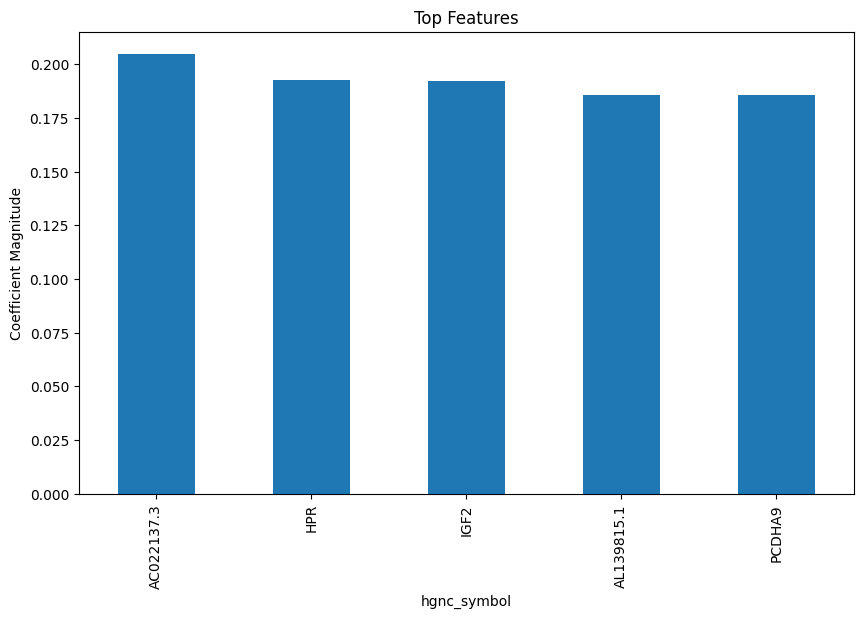

In [345]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))  # adjust the size of the figure as needed
top_features.plot(kind='bar')
plt.title('Top Features')
plt.ylabel('Coefficient Magnitude')
plt.show()


In [357]:
# Known gene
baseline_genes = ['APOE','APP', 'PSEN1', 'MAPT', 'PLD3']  # add more known genes to this list
top_features1 = top_features

# Add coefficients of known genes to the top_features
for gene in baseline_genes:
    ensembl_id = ETG[ETG['hgnc_symbol'] == gene]['ensembl_gene_id'].values[0]  # get the Ensembl ID of the gene
    coef = coef_series[ensembl_id]  # get the coefficient of the gene
    top_features1[gene] = coef  # add the gene and its coefficient to the top_features


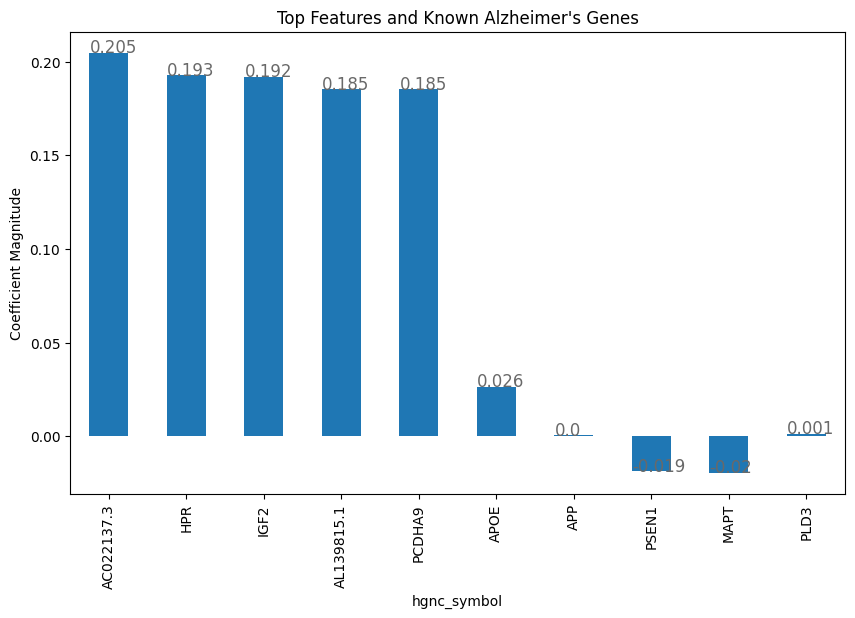

In [359]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))  # adjust the size of the figure as needed
top1_features.plot(kind='bar', ax=ax)
plt.title('Top Features and Known Alzheimer\'s Genes')
plt.ylabel('Coefficient Magnitude')

for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), round(i.get_height(), 3), fontsize=12, color='dimgrey')
    
plt.show()


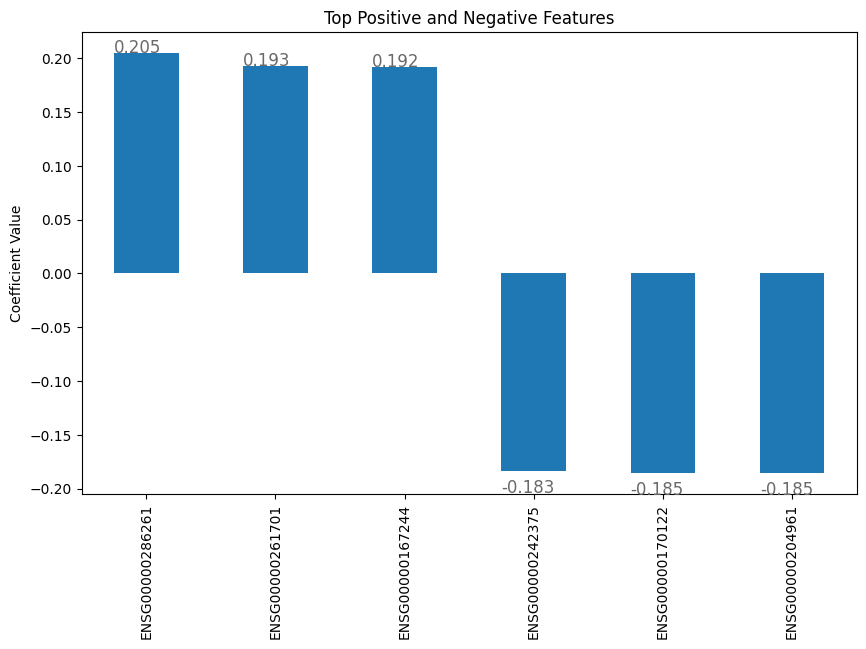

In [356]:
# Sort the coefficients in descending order
coef_series_sorted = coef_series.sort_values(ascending=False)

# Get the top n positive features and top n negative features
top_positive_features = coef_series_sorted[:3]
top_negative_features = coef_series_sorted[-3:]

# Concatenate these series together
top_features = pd.concat([top_positive_features, top_negative_features])

# Plot the bar graph
ax = top_features.plot(kind='bar', figsize=(10, 6))

# Add the values on top of each bar
for i in ax.patches:
    # Place the label at the top of the bar for positive coefficients, bottom for negative
    if i.get_height() > 0:
        ax.text(i.get_x(), i.get_height(), round(i.get_height(), 3), fontsize=12, color='dimgrey')
    else:
        ax.text(i.get_x(), i.get_height()-0.02, round(i.get_height(), 3), fontsize=12, color='dimgrey')

plt.title('Top Positive and Negative Features')
plt.ylabel('Coefficient Value')
plt.show()


In [374]:
ls1 = df.columns.tolist()

In [376]:
print(ls1)

['feature', '510_120515', '207_120424', '81_120417', '649_120529', '487_120515', '182_120424', '193_120424', '694_120605', '366_120502', '52_120416', '522_120515', '493_120515', '602_120523', '634_120524', '653_120529', '391_120503', '453_120507', '371_120502', '414_120503', '102_120418', '641_120524', '111_120418', '600_120523', '188_120424', '321_120501', '547_120516', '130_120419', '305_120430', '668_120530', '555_120517', '679_120604', '318_120501', '112_120418', '689_120604', '418_120507', '589_120522', '216_120425', '654_120529', '619_120524', '358_120502', '312_120430', '624_120524', '576_120521', '410_120503', '274_120430', '408_120503', '76_120417', '340_120501', '288_120430', '222_120425', '234_120425', '578_120521', '46_120416', '477_120514', '683_120604', '39_120416', '309_120430', '121_120418', '405_120503', '482_120514', '607_120523', '565_120517', '120_120418', '507_120515', '260_120426', '273_120430', '524_120515', '556_120517', '113_120418', '160_120423', '698_120605',